In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from neo4j import GraphDatabase
import scipy

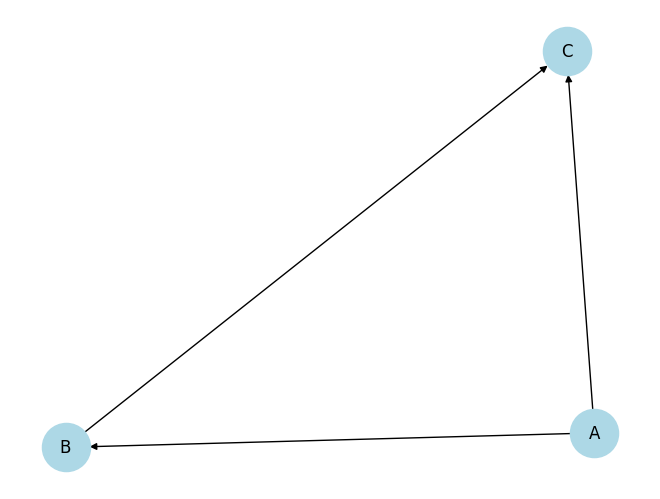

In [10]:
G = nx.DiGraph()
G.add_node('A')
G.add_node('B')
G.add_node('C')

# Add edges to the graph (directional)
G.add_edge('A', 'B')
G.add_edge('A', 'C')
G.add_edge('B', 'C')

# Draw the graph
nx.draw(G, with_labels=True, node_color='lightblue', node_size=1200)
plt.show()

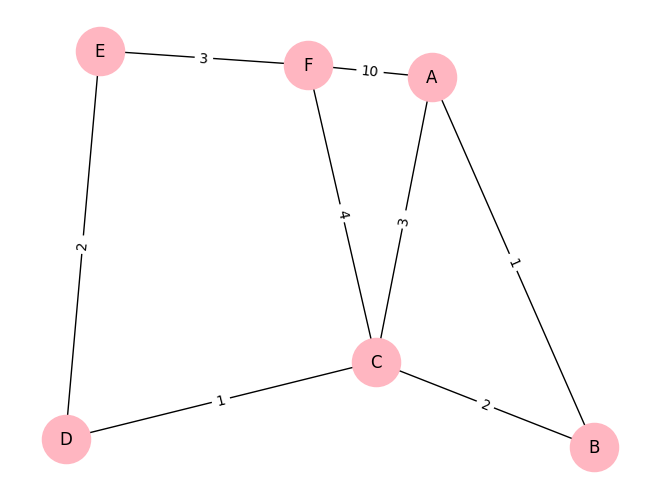

Shortest path from A to F: ['A', 'C', 'F']
Shortest path length from A to F: 7


In [11]:
G = nx.Graph()

G.add_edge('A', 'B', weight=1)
G.add_edge('B', 'C', weight=2)
G.add_edge('A', 'C', weight=3)
G.add_edge('C', 'D', weight=1)
G.add_edge('D', 'E', weight=2)
G.add_edge('E', 'F', weight=3)
G.add_edge('C', 'F', weight=4)
G.add_edge('A', 'F', weight=10)

pos = nx.spring_layout(G)  
nx.draw(G, pos, with_labels=True, node_color='lightpink', node_size=1200)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()

shortest_path = nx.shortest_path(G, 'A', 'F', weight='weight')
print("Shortest path from A to F:", shortest_path)

shortest_path_length = nx.shortest_path_length(G, 'A', 'F', weight='weight')
print("Shortest path length from A to F:", shortest_path_length)


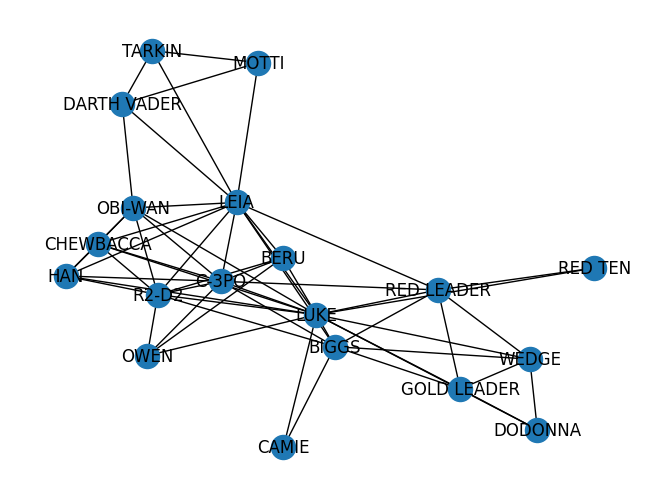

In [4]:
# The original dataset is from:
# Gabasova, E. (2016). Star Wars social network. DOI: https://doi.org/10.5281/zenodo.1411479
# 
# Simplified by Federico Albanese.

characters = ["R2-D2",
                "CHEWBACCA",
                "C-3PO",
                "LUKE",
                "DARTH VADER",
                "CAMIE",
                "BIGGS",
                "LEIA",
                "BERU",
                "OWEN",
                "OBI-WAN",
                "MOTTI",
                "TARKIN",
                "HAN",
                "DODONNA",
                "GOLD LEADER",
                "WEDGE",
                "RED LEADER",
                "RED TEN"]


edges = [("CHEWBACCA", "R2-D2"),
        ("C-3PO", "R2-D2"),
        ("BERU", "R2-D2"),
        ("LUKE", "R2-D2"),
        ("OWEN", "R2-D2"),
        ("OBI-WAN", "R2-D2"),
        ("LEIA", "R2-D2"),
        ("BIGGS", "R2-D2"),
        ("HAN", "R2-D2"),
        ("CHEWBACCA", "OBI-WAN"),
        ("C-3PO", "CHEWBACCA"),
        ("CHEWBACCA", "LUKE"),
        ("CHEWBACCA", "HAN"),
        ("CHEWBACCA", "LEIA"),
        ("CAMIE", "LUKE"),
        ("BIGGS", "CAMIE"),
        ("BIGGS", "LUKE"),
        ("DARTH VADER", "LEIA"),
        ("BERU", "LUKE"),
        ("BERU", "OWEN"),
        ("BERU", "C-3PO"),
        ("LUKE", "OWEN"),
        ("C-3PO", "LUKE"),
        ("C-3PO", "OWEN"),
        ("C-3PO", "LEIA"),
        ("LEIA", "LUKE"),
        ("BERU", "LEIA"),
        ("LUKE", "OBI-WAN"),
        ("C-3PO", "OBI-WAN"),
        ("LEIA", "OBI-WAN"),
        ("MOTTI", "TARKIN"),
        ("DARTH VADER", "MOTTI"),
        ("DARTH VADER", "TARKIN"),
        ("HAN", "OBI-WAN"),
        ("HAN", "LUKE"),
        ("C-3PO", "HAN"),
        ("LEIA", "MOTTI"),
        ("LEIA", "TARKIN"),
        ("HAN", "LEIA"),
        ("DARTH VADER", "OBI-WAN"),
        ("DODONNA", "GOLD LEADER"),
        ("DODONNA", "WEDGE"),
        ("DODONNA", "LUKE"),
        ("GOLD LEADER", "WEDGE"),
        ("GOLD LEADER", "LUKE"),
        ("LUKE", "WEDGE"),
        ("BIGGS", "LEIA"),
        ("LEIA", "RED LEADER"),
        ("LUKE", "RED LEADER"),
        ("BIGGS", "RED LEADER"),
        ("BIGGS", "C-3PO"),
        ("C-3PO", "RED LEADER"),
        ("RED LEADER", "WEDGE"),
        ("GOLD LEADER", "RED LEADER"),
        ("BIGGS", "WEDGE"),
        ("RED LEADER", "RED TEN"),
        ("BIGGS", "GOLD LEADER"),
        ("LUKE", "RED TEN")]

G_starWars = nx.Graph()


G_starWars.add_nodes_from(characters)
G_starWars.add_edges_from(edges)
nx.draw(G_starWars, with_labels = True)

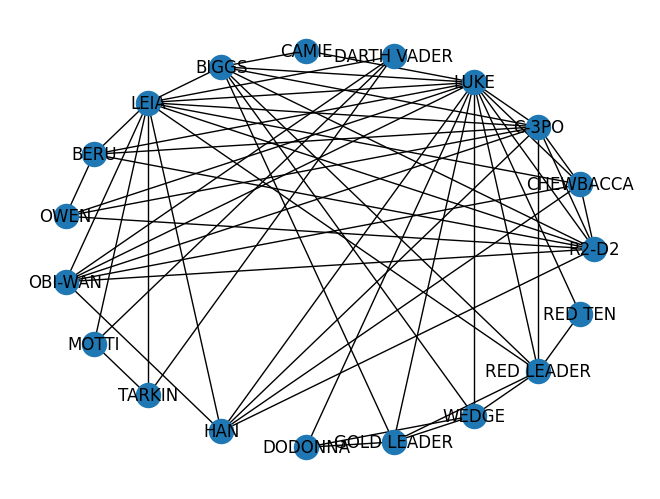

In [5]:
pos = nx.circular_layout(G_starWars)
nx.draw(G_starWars, pos = pos, with_labels = True)

In [6]:
print(G_starWars.degree["LUKE"]) #measures how many other characters LUKE shared a scene with.
print(G_starWars.degree)

15
[('R2-D2', 9), ('CHEWBACCA', 6), ('C-3PO', 10), ('LUKE', 15), ('DARTH VADER', 4), ('CAMIE', 2), ('BIGGS', 8), ('LEIA', 12), ('BERU', 5), ('OWEN', 4), ('OBI-WAN', 7), ('MOTTI', 3), ('TARKIN', 3), ('HAN', 6), ('DODONNA', 3), ('GOLD LEADER', 5), ('WEDGE', 5), ('RED LEADER', 7), ('RED TEN', 2)]


In [7]:
print(sorted(G_starWars.degree, key=lambda x: x[1], reverse=True))

[('LUKE', 15), ('LEIA', 12), ('C-3PO', 10), ('R2-D2', 9), ('BIGGS', 8), ('OBI-WAN', 7), ('RED LEADER', 7), ('CHEWBACCA', 6), ('HAN', 6), ('BERU', 5), ('GOLD LEADER', 5), ('WEDGE', 5), ('DARTH VADER', 4), ('OWEN', 4), ('MOTTI', 3), ('TARKIN', 3), ('DODONNA', 3), ('CAMIE', 2), ('RED TEN', 2)]


In [8]:
pageranks = nx.pagerank(G_starWars)  
print(pageranks["LUKE"])

# sort nodes by PageRank score
sorted_pageranks = sorted(pageranks.items(), key=lambda x: x[1], reverse=True)
print(sorted_pageranks)


0.12100659993223407
[('LUKE', 0.12100659993223407), ('LEIA', 0.09774670243167148), ('C-3PO', 0.07846841056739243), ('R2-D2', 0.07109657598978128), ('BIGGS', 0.06716470572053924), ('RED LEADER', 0.06034035361675809), ('OBI-WAN', 0.057499521146130786), ('CHEWBACCA', 0.0489810778291624), ('HAN', 0.0489810778291624), ('GOLD LEADER', 0.045516866707278114), ('WEDGE', 0.045516866707278114), ('BERU', 0.042576910179289884), ('DARTH VADER', 0.040288371907147236), ('OWEN', 0.03537418136290535), ('MOTTI', 0.032623993347091276), ('TARKIN', 0.032623993347091276), ('DODONNA', 0.030227223567836442), ('RED TEN', 0.022078678866886185), ('CAMIE', 0.021887888944363686)]


Community Detection Algorithms:

In [9]:
from networkx.algorithms.community.label_propagation import label_propagation_communities

communities = label_propagation_communities(G_starWars)
print([community for community in communities])

[{'LEIA', 'CHEWBACCA', 'HAN', 'DODONNA', 'R2-D2', 'OBI-WAN', 'CAMIE', 'BERU', 'OWEN', 'GOLD LEADER', 'BIGGS', 'C-3PO', 'RED LEADER', 'RED TEN', 'WEDGE', 'LUKE'}, {'MOTTI', 'TARKIN', 'DARTH VADER'}]


In [18]:
sim = nx.panther_similarity(G_starWars, "LUKE")
print(sim)

{'R2-D2': 0.17708333333333331, 'BIGGS': 0.171875, 'RED LEADER': 0.15625, 'C-3PO': 0.14583333333333331}
